In [1]:
import datetime, os
print('hih8hh')
print(datetime.datetime.now().strftime('%F %T'))

hih8hh
2018-10-03 15:47:43


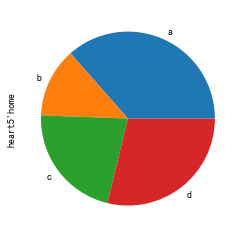

In [12]:
%matplotlib inline
import pandas as pd

A = [[62, 22, 37, 49],
     [5, 6, 7, 8]]

[[r[c] for r in A] for c in range(len(A[0]))]

sr = pd.Series(A[0], index=['a', 'b', 'c', 'd'])
sr.name = 'heart5\'home'
sr.plot(kind='pie')


In [ ]:
# %load ../etc/log2note.py
"""
4524187f-c131-4d7d-b6cc-a1af20474a7f notification 笔记本
4a940ff2-74a8-4584-be46-aa6d68a4fa53 everworklog 笔记
log目录

"""

import os
from threading import Timer
import pathmagic

with pathmagic.context():
    from func.first import getdirmain
    from func.configpr import getcfp
    from func.evernt import get_notestore, imglist2note
    from func.logme import log
    from func.wrapfuncs import timethis


@timethis
def log2notetimer(jiangemiao):
    print(getdirmain())
    pathlog = getdirmain() / 'log'
    files = os.listdir(str(pathlog))
    loglines = []
    for fname in files[::-1]:
        with open(pathlog / fname, 'r', encoding='utf-8') as flog:
            loglines = loglines + [
                line.strip() for line in flog if line.find('CRITICAL') >= 0
            ]

    print(f'日志共有{len(loglines)}条记录')
    # global cfp, inifilepath
    cfp, cfppath = getcfp('everwork')
    everlogc = cfp.getint('evernote', 'everlogc')
    if len(loglines) == everlogc:  # <=调整为==，用来应对log文件崩溃重建的情况
        log.info('暂无新记录，不更新everworklog笔记。')
    else:
        loglinestr = '\n'.join(loglines[::-1])
        loglinestr = loglinestr.replace('<', '《')
        loglinestr = loglinestr.replace('>', '》')
        loglinestr = loglinestr.replace('&', '并符')
        loglinestr = loglinestr.replace('=', '等于')
        loglinestr = '<pre>' + loglinestr + '</pre>'
        # print(loglinestr)
        noteguid_lognote = '4a940ff2-74a8-4584-be46-aa6d68a4fa53'
        try:
            nstore = get_notestore()
            imglist2note(nstore, [], noteguid_lognote, 'everwork日志严重错误信息',
                         loglinestr)
            cfp.set('evernote', 'everlogc', '%d' % len(loglines))
            cfp.write(open(cfppath, 'w', encoding='utf-8'))
            log.info('新的log错误信息成功更新入笔记，将于%d秒后再次自动检查并更新' % jiangemiao)
        except Exception as eeee:
            log.critical('处理新log错误信息到笔记时出现未名错误。%s' % (str(eeee)))

    global timer_log2note
    timer_log2note = Timer(jiangemiao, log2notetimer, [jiangemiao])
    timer_log2note.start()


if __name__ == '__main__':
    # global log
    # log.info(f'运行文件\t{__file__}')
    log2notetimer(60 * 2)
    print('Done.')

In [ ]:
' & '.join('A|B|C|D|E|F|G'.split('|'))

In [ ]:
import os

print(__file__)

In [1]:
%run ../etc/log2note.py

2018-10-03 15:58:58,571	MainThread - 490446899624 , MainProcess - 27483: INFO     程序上次异常退出，调用log中的API数据[2018-10-03 14:48:10,0]
2018-10-03 15:58:58,581	MainThread - 490446899624 , MainProcess - 27483: INFO     Evernote API调用次数：0，写入配置文件everwork.ini
2018-10-03 15:58:58,761	MainThread - 490446899624 , MainProcess - 27483: INFO     暂无新记录，不更新everworklog笔记。


                 asctime                                   levelnamemessage  \
2136 2018-10-03 14:48:10  DEBUG: 动用了Evernote API(<evernote.api.client.St...   

      counts  
2136       0  
..
日志共有1079条记录
log2notetimer 0.17628717422485352
Done.
